## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [8]:
import os
import keras
import itertools

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [14]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000, Momentum = 0.70


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast r

Epoch 29/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.0652 - acc: 0.6170 - val_loss: 1.6808 - val_acc: 0.4652
Epoch 30/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.0551 - acc: 0.6213 - val_loss: 1.5249 - val_acc: 0.4899
Epoch 31/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.0479 - acc: 0.6223 - val_loss: 1.5776 - val_acc: 0.4742
Epoch 32/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.0222 - acc: 0.6308 - val_loss: 1.7019 - val_acc: 0.4533
Epoch 33/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.0008 - acc: 0.6403 - val_loss: 1.5530 - val_acc: 0.4861
Epoch 34/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9885 - acc: 0.6436 - val_loss: 1.5859 - val_acc: 0.4933
Epoch 35/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.9941 - acc: 0.6412 - val_loss: 1.7146 - val_acc: 0.4587
Epoch 36/50
50000/50000 [=========

50000/50000 [==============================] - 3s 61us/step - loss: 1.3030 - acc: 0.5333 - val_loss: 1.5968 - val_acc: 0.4701
Epoch 31/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3031 - acc: 0.5313 - val_loss: 1.6610 - val_acc: 0.4413
Epoch 32/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2929 - acc: 0.5389 - val_loss: 1.7931 - val_acc: 0.4167
Epoch 33/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2899 - acc: 0.5370 - val_loss: 1.6314 - val_acc: 0.4462
Epoch 34/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2738 - acc: 0.5436 - val_loss: 1.5763 - val_acc: 0.4663
Epoch 35/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2685 - acc: 0.5462 - val_loss: 1.5596 - val_acc: 0.4591
Epoch 36/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2628 - acc: 0.5477 - val_loss: 1.5798 - val_acc: 0.4659
Epoch 37/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 62us/step - loss: 1.5216 - acc: 0.4602 - val_loss: 1.7291 - val_acc: 0.4029
Epoch 32/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5043 - acc: 0.4692 - val_loss: 1.6255 - val_acc: 0.4305
Epoch 33/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5073 - acc: 0.4652 - val_loss: 1.6776 - val_acc: 0.4044
Epoch 34/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5085 - acc: 0.4637 - val_loss: 1.6411 - val_acc: 0.4212
Epoch 35/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4998 - acc: 0.4693 - val_loss: 1.6242 - val_acc: 0.4391
Epoch 36/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5036 - acc: 0.4665 - val_loss: 1.6201 - val_acc: 0.4229
Epoch 37/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4916 - acc: 0.4712 - val_loss: 1.6314 - val_acc: 0.4276
Epoch 38/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 61us/step - loss: 2.3075 - acc: 0.0985 - val_loss: 2.3069 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.3074 - acc: 0.0983 - val_loss: 2.3077 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.3080 - acc: 0.1027 - val_loss: 2.3086 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.3073 - acc: 0.0995 - val_loss: 2.3063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.3072 - acc: 0.0987 - val_loss: 2.3082 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3066 - acc: 0.0990 - val_loss: 2.3052 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3061 - acc: 0.1011 - val_loss: 2.3057 - val_acc: 0.1000
Epoch 39/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 60us/step - loss: 1.0672 - acc: 0.6252 - val_loss: 1.3671 - val_acc: 0.5225
Epoch 34/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.0564 - acc: 0.6288 - val_loss: 1.6081 - val_acc: 0.4580
Epoch 35/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.0463 - acc: 0.6312 - val_loss: 1.3511 - val_acc: 0.5339
Epoch 36/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.0340 - acc: 0.6372 - val_loss: 1.3417 - val_acc: 0.5319
Epoch 37/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.0156 - acc: 0.6438 - val_loss: 1.5138 - val_acc: 0.4928
Epoch 38/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.0130 - acc: 0.6443 - val_loss: 1.4155 - val_acc: 0.5091
Epoch 39/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.9897 - acc: 0.6522 - val_loss: 1.4460 - val_acc: 0.5010
Epoch 40/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 60us/step - loss: 0.7292 - acc: 0.7440 - val_loss: 1.5075 - val_acc: 0.5205
Epoch 35/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.6906 - acc: 0.7546 - val_loss: 1.6651 - val_acc: 0.5114
Epoch 36/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.6820 - acc: 0.7578 - val_loss: 1.5558 - val_acc: 0.5353
Epoch 37/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.6519 - acc: 0.7684 - val_loss: 1.6759 - val_acc: 0.5125
Epoch 38/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.6388 - acc: 0.7752 - val_loss: 1.6854 - val_acc: 0.5131
Epoch 39/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.6190 - acc: 0.7828 - val_loss: 1.7694 - val_acc: 0.5070
Epoch 40/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.5848 - acc: 0.7939 - val_loss: 1.6855 - val_acc: 0.5119
Epoch 41/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 60us/step - loss: 0.6279 - acc: 0.7769 - val_loss: 1.6397 - val_acc: 0.5313
Epoch 36/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.6017 - acc: 0.7848 - val_loss: 1.6750 - val_acc: 0.5267
Epoch 37/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.5776 - acc: 0.7932 - val_loss: 1.7346 - val_acc: 0.5208
Epoch 38/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.5572 - acc: 0.7997 - val_loss: 1.8000 - val_acc: 0.5165
Epoch 39/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.5514 - acc: 0.8020 - val_loss: 1.7986 - val_acc: 0.5303
Epoch 40/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.5330 - acc: 0.8097 - val_loss: 1.8783 - val_acc: 0.5219
Epoch 41/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.5135 - acc: 0.8166 - val_loss: 1.9074 - val_acc: 0.5152
Epoch 42/50
50000/50000 [=====================

50000/50000 [==============================] - 4s 71us/step - loss: 0.8702 - acc: 0.6870 - val_loss: 1.6893 - val_acc: 0.5020
Epoch 37/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.8363 - acc: 0.7000 - val_loss: 1.7779 - val_acc: 0.5037
Epoch 38/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.8548 - acc: 0.6924 - val_loss: 1.7185 - val_acc: 0.5009
Epoch 39/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.8476 - acc: 0.6958 - val_loss: 1.7270 - val_acc: 0.5005
Epoch 40/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.8279 - acc: 0.7016 - val_loss: 1.7642 - val_acc: 0.5009
Epoch 41/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.8128 - acc: 0.7069 - val_loss: 1.7706 - val_acc: 0.4965
Epoch 42/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.8277 - acc: 0.7041 - val_loss: 1.8382 - val_acc: 0.5057
Epoch 43/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 61us/step - loss: 1.5127 - acc: 0.4731 - val_loss: 1.5344 - val_acc: 0.4602
Epoch 38/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5068 - acc: 0.4762 - val_loss: 1.5384 - val_acc: 0.4607
Epoch 39/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5014 - acc: 0.4762 - val_loss: 1.5291 - val_acc: 0.4589
Epoch 40/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4959 - acc: 0.4774 - val_loss: 1.5237 - val_acc: 0.4648
Epoch 41/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4895 - acc: 0.4809 - val_loss: 1.5299 - val_acc: 0.4571
Epoch 42/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4845 - acc: 0.4823 - val_loss: 1.5194 - val_acc: 0.4616
Epoch 43/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4801 - acc: 0.4850 - val_loss: 1.5213 - val_acc: 0.4632
Epoch 44/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 60us/step - loss: 1.2400 - acc: 0.5644 - val_loss: 1.3896 - val_acc: 0.5002
Epoch 39/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2312 - acc: 0.5686 - val_loss: 1.3567 - val_acc: 0.5143
Epoch 40/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2208 - acc: 0.5691 - val_loss: 1.3820 - val_acc: 0.5121
Epoch 41/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2127 - acc: 0.5734 - val_loss: 1.3888 - val_acc: 0.5082
Epoch 42/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.2037 - acc: 0.5769 - val_loss: 1.3703 - val_acc: 0.5129
Epoch 43/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.1968 - acc: 0.5792 - val_loss: 1.3660 - val_acc: 0.5196
Epoch 44/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.1865 - acc: 0.5826 - val_loss: 1.3387 - val_acc: 0.5245
Epoch 45/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 66us/step - loss: 0.9921 - acc: 0.6516 - val_loss: 1.3469 - val_acc: 0.5307
Epoch 40/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.9738 - acc: 0.6593 - val_loss: 1.3701 - val_acc: 0.5239
Epoch 41/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9621 - acc: 0.6622 - val_loss: 1.3688 - val_acc: 0.5214
Epoch 42/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9453 - acc: 0.6685 - val_loss: 1.3588 - val_acc: 0.5310
Epoch 43/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.9448 - acc: 0.6693 - val_loss: 1.3717 - val_acc: 0.5314
Epoch 44/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.9270 - acc: 0.6754 - val_loss: 1.3764 - val_acc: 0.5293
Epoch 45/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9190 - acc: 0.6765 - val_loss: 1.4288 - val_acc: 0.5152
Epoch 46/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 64us/step - loss: 0.6372 - acc: 0.7736 - val_loss: 1.6306 - val_acc: 0.5310
Epoch 41/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.6290 - acc: 0.7757 - val_loss: 1.6645 - val_acc: 0.5351
Epoch 42/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.5964 - acc: 0.7860 - val_loss: 1.6433 - val_acc: 0.5318
Epoch 43/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.5635 - acc: 0.7994 - val_loss: 1.6733 - val_acc: 0.5327
Epoch 44/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.5450 - acc: 0.8081 - val_loss: 1.7160 - val_acc: 0.5315
Epoch 45/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.5372 - acc: 0.8062 - val_loss: 1.7074 - val_acc: 0.5372
Epoch 46/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.5241 - acc: 0.8157 - val_loss: 1.7872 - val_acc: 0.5270
Epoch 47/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 64us/step - loss: 1.8744 - acc: 0.3420 - val_loss: 1.8746 - val_acc: 0.3434
Epoch 42/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8708 - acc: 0.3431 - val_loss: 1.8708 - val_acc: 0.3444
Epoch 43/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8672 - acc: 0.3447 - val_loss: 1.8673 - val_acc: 0.3467
Epoch 44/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8636 - acc: 0.3452 - val_loss: 1.8641 - val_acc: 0.3440
Epoch 45/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8603 - acc: 0.3464 - val_loss: 1.8607 - val_acc: 0.3485
Epoch 46/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8569 - acc: 0.3478 - val_loss: 1.8576 - val_acc: 0.3459
Epoch 47/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8537 - acc: 0.3486 - val_loss: 1.8545 - val_acc: 0.3473
Epoch 48/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 63us/step - loss: 1.6955 - acc: 0.4136 - val_loss: 1.6958 - val_acc: 0.4084
Epoch 43/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6919 - acc: 0.4138 - val_loss: 1.6930 - val_acc: 0.4091
Epoch 44/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6883 - acc: 0.4156 - val_loss: 1.6897 - val_acc: 0.4133
Epoch 45/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6843 - acc: 0.4168 - val_loss: 1.6854 - val_acc: 0.4139
Epoch 46/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6808 - acc: 0.4187 - val_loss: 1.6818 - val_acc: 0.4142
Epoch 47/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6771 - acc: 0.4185 - val_loss: 1.6794 - val_acc: 0.4131
Epoch 48/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6738 - acc: 0.4206 - val_loss: 1.6750 - val_acc: 0.4170
Epoch 49/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 64us/step - loss: 1.5787 - acc: 0.4494 - val_loss: 1.5921 - val_acc: 0.4458
Epoch 44/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5741 - acc: 0.4506 - val_loss: 1.5887 - val_acc: 0.4467
Epoch 45/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5701 - acc: 0.4524 - val_loss: 1.5837 - val_acc: 0.4480
Epoch 46/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5649 - acc: 0.4553 - val_loss: 1.5811 - val_acc: 0.4518
Epoch 47/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5602 - acc: 0.4553 - val_loss: 1.5791 - val_acc: 0.4481
Epoch 48/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5565 - acc: 0.4564 - val_loss: 1.5715 - val_acc: 0.4524
Epoch 49/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5518 - acc: 0.4584 - val_loss: 1.5691 - val_acc: 0.4514
Epoch 50/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 63us/step - loss: 1.1975 - acc: 0.5822 - val_loss: 1.3536 - val_acc: 0.5181
Epoch 45/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.1867 - acc: 0.5847 - val_loss: 1.3521 - val_acc: 0.5216
Epoch 46/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.1782 - acc: 0.5884 - val_loss: 1.3454 - val_acc: 0.5257
Epoch 47/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.1679 - acc: 0.5919 - val_loss: 1.3491 - val_acc: 0.5213
Epoch 48/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.1599 - acc: 0.5953 - val_loss: 1.3445 - val_acc: 0.5218
Epoch 49/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.1507 - acc: 0.5975 - val_loss: 1.3514 - val_acc: 0.5200
Epoch 50/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.1407 - acc: 0.5997 - val_loss: 1.3473 - val_acc: 0.5268
Experiment with LR = 0.000010, Momentum = 0.70

50000/50000 [==============================] - 3s 60us/step - loss: 2.1778 - acc: 0.2299 - val_loss: 2.1747 - val_acc: 0.2389
Epoch 46/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1756 - acc: 0.2308 - val_loss: 2.1725 - val_acc: 0.2391
Epoch 47/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1734 - acc: 0.2323 - val_loss: 2.1703 - val_acc: 0.2394
Epoch 48/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1713 - acc: 0.2326 - val_loss: 2.1682 - val_acc: 0.2392
Epoch 49/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.1691 - acc: 0.2335 - val_loss: 2.1661 - val_acc: 0.2401
Epoch 50/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1670 - acc: 0.2349 - val_loss: 2.1640 - val_acc: 0.2408
Experiment with LR = 0.000010, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input

50000/50000 [==============================] - 3s 63us/step - loss: 2.0420 - acc: 0.2920 - val_loss: 2.0388 - val_acc: 0.2926
Epoch 47/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.0383 - acc: 0.2926 - val_loss: 2.0351 - val_acc: 0.2943
Epoch 48/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.0346 - acc: 0.2942 - val_loss: 2.0314 - val_acc: 0.2959
Epoch 49/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.0310 - acc: 0.2965 - val_loss: 2.0278 - val_acc: 0.2951
Epoch 50/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.0274 - acc: 0.2972 - val_loss: 2.0243 - val_acc: 0.2966
Experiment with LR = 0.000010, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_laye

50000/50000 [==============================] - 3s 62us/step - loss: 1.9394 - acc: 0.3269 - val_loss: 1.9353 - val_acc: 0.3305
Epoch 48/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.9359 - acc: 0.3284 - val_loss: 1.9319 - val_acc: 0.3301
Epoch 49/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.9325 - acc: 0.3302 - val_loss: 1.9285 - val_acc: 0.3322
Epoch 50/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9292 - acc: 0.3312 - val_loss: 1.9253 - val_acc: 0.3335
Experiment with LR = 0.000010, Momentum = 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (De

50000/50000 [==============================] - 3s 63us/step - loss: 1.7118 - acc: 0.4039 - val_loss: 1.7125 - val_acc: 0.4022
Epoch 49/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7085 - acc: 0.4057 - val_loss: 1.7091 - val_acc: 0.4034
Epoch 50/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7046 - acc: 0.4069 - val_loss: 1.7054 - val_acc: 0.4062


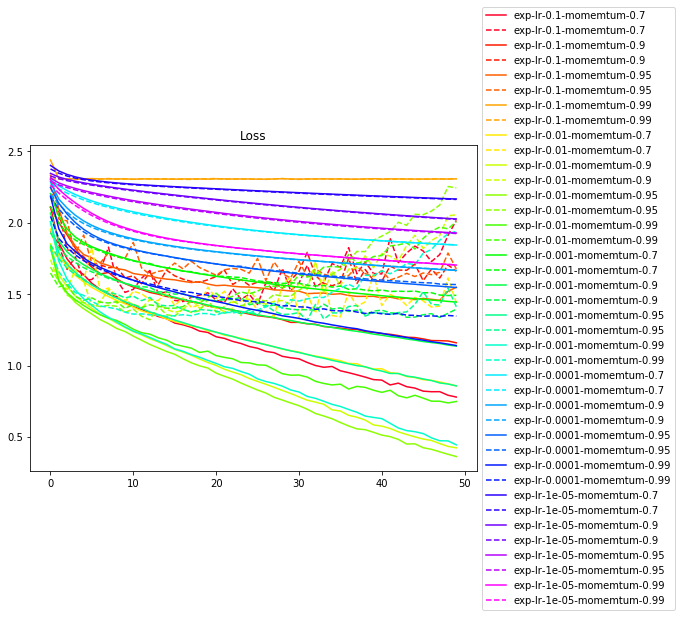

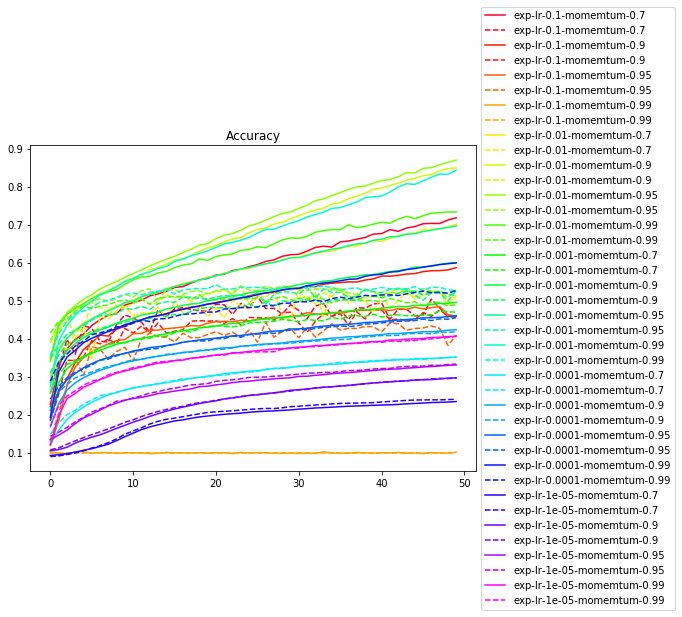

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()